# Τεχνικές Εξόρυξης Δεδομένων - Εργαστηριακή Άσκηση 3
---

Η εργαστηριακή άσκηση αυτή εστιάζει στην ανάλυση κειμένου (Text Analytics). Στην άσκηση αυτή Θα υλοποιήσετε μια συνάρτηση η οποία θα πραγματοποιεί μια πολύ βασική λειτουργία, ενώ θα σας γνωστοποηθούν βασικά προβλήματα στην ανάλυση κειμένου τα οποία θα κληθείτε να επιλύσετε βελτιώνοντας συνεχώς την συνάρτηση σας.

Στην άσκηση αυτή θα χρειαστούν οι εξής βιβλιοθήκες:
* matplotlib (pyplot module)
* BeautifulSoup

In [ ]:
# Χρησιμοποιώντας την εντολή import, εισάγετε τις προαναφερθείσες βιβλιοθήκες
# Αν δεν είναι εγκατεστημένες μπορείτε να χρησιμοποιήσετε την εντολή: !pip install <module1> <module2> ... 
# για να την εγκαταστήσετε.
# Συνίσταται να ορίσετε local names (pd για το pandas, plt για το matplotlib.pyplot)

# !pip install beautifulsoup4

import matplotlib.pyplot as plt

# Συμβουλευτείτε την ενότητα Quick Start:
# https://www.crummy.com/software/BeautifulSoup/bs3/documentation.html#Quick%20Start
# για τον τροπο εισαγωγής της BeatifulSoup που θα λειτουργεί σε εσάς.

from bs4 import BeautifulSoup

# Χρησιμοπoείται για inline plotting
%matplotlib inline 

---
## 1. Wordcount

Δεν είναι γνωστοί ακόμη αλγόριθμοι οι οποίο θα βοηθούν τον υπλογιστή να κατανοήσει το 100% μιας πρότασης. Ωστόσο, υπάρχουν αρκετοί "έμμεσοι" τρόποι να πάρουμε πληροφορίες για την πρόταση αυτή. Για παράδειγμα, αν μια λέξη επαναλαμβάνεται αρκετές φορές, ενδεχομένως να αποτελεί το επίκεντρο ολόκληρης της πρότασης.

<BarContainer object of 13 artists>

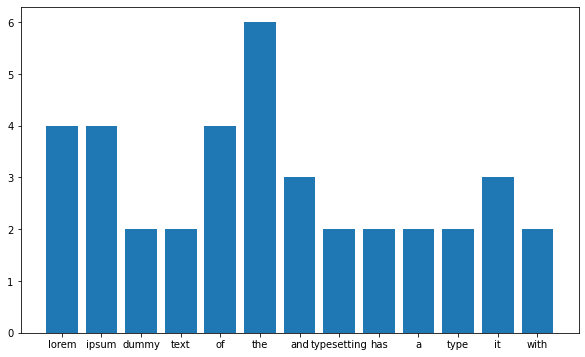

In [ ]:
# Γράψτε μία συνάρτηση η οποία θα μετράει πόσες φορές εμφανίζεται κάθε λέξη σε μία πρόταση
# και χρησιμοποιήστε την στην συμβολοσειρά text2count
# Υπόδειξη : str.split()
# Επιπλέον, κατασκευάστε ένα bar plot που θα δείχνει όλες τις λέξεις που εμφανίζονται πάνω από 1 φορά
# Tο plotting δεν θα πρέπει να γίνεται εντός της συνάρτησης.

text2count = 'Lorem Ipsum is simply dummy text of the printing and typesetting industry. Lorem Ipsum has been the industry\'s standard dummy text ever since the 1500s, when an unknown printer took a galley of type and scrambled it to make a type specimen book. It has survived not only five centuries, but also the leap into electronic typesetting, remaining essentially unchanged. It was popularised in the 1960s with the release of Letraset sheets containing Lorem Ipsum passages, and more recently with desktop publishing software like Aldus PageMaker including versions of Lorem Ipsum.'

def wordcount(s):
    wordlist = []
    countlist = []
    
    s = s.replace('.','')
    s = s.replace(',','')
    
    s = s.split()
    
    for word in s:
        if not word.lower() in wordlist:
            wordlist.append(word.lower())
            countlist.append(1)
        else:
            for j in range(len(wordlist)):
                if wordlist[j] == word.lower():
                    countlist[j] = countlist[j] + 1
                    break
                    
    wordlist2 = []
    countlist2 = []
    
    for i in range(0,len(wordlist)):
        if i <= (len(countlist)) and countlist[i] > 1:
            wordlist2.append(wordlist[i])
            countlist2.append(countlist[i])
                    
    return wordlist2,countlist2

wl,wc = wordcount(text2count)

fig = plt.figure(figsize=(10,6))

plt.bar(wl,wc)


Οι λέξεις με εμφανίσεις παραπάνω από 1 θα πρέπει να είναι:
<table>
    <tr>
        <td><b>the</b></td>
        <td>6</td>
    </tr>
    <tr>
        <td><b>of</b></td>
        <td>4</td>
    </tr>
    <tr>
        <td><b>ipsum</b></td>
        <td>4</td>
    </tr>
    <tr>
        <td><b>lorem</b></td>
        <td>4</td>
    </tr>
    <tr>
        <td><b>it</b></td>
        <td>3</td>
    </tr>
    <tr>
        <td><b>and</b></td>
        <td>3</td>
    </tr>
    <tr>
        <td><b>with</b></td>
        <td>2</td>
    </tr>
    <tr>
        <td><b>type</b></td>
        <td>2</td>
    </tr>
    <tr>
        <td><b>a</b></td>
        <td>2</td>
    </tr>
    <tr>
        <td><b>has</b></td>
        <td>2</td>
    </tr>
    <tr>
        <td><b>typesetting</b></td>
        <td>2</td>
    </tr>
    <tr>
        <td><b>text</b></td>
        <td>2</td>
    </tr>
    <tr>
        <td><b>dummy</b></td>
        <td>2</td>
    </tr>
</table>

Σε περίπτωση που δεν έχετε τα ίδια αποτελέσματα ελέγξτε τα παρακάτω:

* Οι λέξεις **It** και **it** θα πρέπει να θεωρούνται ίδιες. Μπορείτε να χρησιμοποιήσετε την `str.lower()` για να διορθώσετε το πρόβλημα αυτό.
* Οι λέξεις **Ipsum** και **Ipsum.** επίσης θεωρούνται ίδιες. Χρησιμοποιήστε την `str.replace()` για να επιλύσετε το πρόβλημα αυτό.

Σε κάθε περίπτωση, οι λέξεις αυτές όντως μας δίνουν το κεντρικό νόημα των δοσμένων προτάσεων.

---
## 2. BeautifulSoup

Ας δούμε τώρα ένα λίγο πιο ενδιαφέρον παράδειγμα. Επιλέξτε μια ιστοσελίδα της αρεσκίας σας και κατεβάστε το αντίστοιχο html αρχείο.


In [ ]:
# Διαβάστε το αρχείο και εκχωρίστε στην μεταβλητή html_doc όλο το markup της σελίδας
# Μην ξεχάσετε να κλείσετε το αρχείο!

f = open("Machine learning - Wikipedia.html", "r")

html_doc = f.read()

f.close()

In [ ]:
# Χρησιμοποιήστε την BeautifulSoup για να "κρατήσετε" μόνο το κείμενο από την σελίδα αυτή
# Συμβουλευτείτε το https://www.crummy.com/software/BeautifulSoup/bs4/doc/

soup = BeautifulSoup(html_doc,'html.parser')

soup = soup.get_text()

print(soup)




Machine learning - Wikipedia































Machine learning

From Wikipedia, the free encyclopedia



Jump to navigation
Jump to search
Scientific study of algorithms and statistical models that computer systems use to perform tasks without explicit instructions
For the journal, see Machine Learning (journal).
"Statistical learning" redirects here. For statistical learning in linguistics, see statistical learning in language acquisition.
Part of a series onMachine learninganddata mining
showProblems
Classification
Clustering
Regression
Anomaly detection
AutoML
Association rules
Reinforcement learning
Structured prediction
Feature engineering
Feature learning
Online learning
Semi-supervised learning
Unsupervised learning
Learning to rank
Grammar induction


showSupervised learning(classification • regression) 
Decision trees
Ensembles
Bagging
Boosting
Random forest
k-NN
Linear regression
Naive Bayes
Artificial neural networks
Logistic regression
Perceptron
Relevance 

['machine', 'learning', 'from', 'the', 'to', 'of', 'and', 'that', 'for', 'in', 'a', 'artificial', 'on', 'is', 'as', 'data', 'are', 'an', '^']
[173, 279, 58, 395, 224, 284, 227, 84, 79, 197, 243, 54, 74, 132, 73, 93, 53, 53, 113]
('the', 'of', 'learning', 'a', 'and', 'to', 'in', 'machine', 'is', '^', 'data', 'that', 'for', 'on', 'as', 'from', 'artificial', 'are', 'an')
(395, 284, 279, 243, 227, 224, 197, 173, 132, 113, 93, 84, 79, 74, 73, 58, 54, 53, 53)


<BarContainer object of 19 artists>

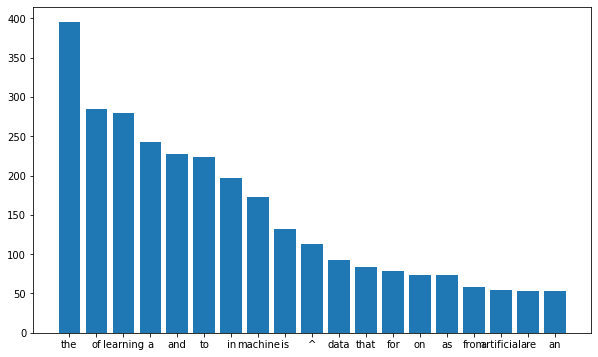

In [ ]:
# Χρησιμοποιήστε την συνάρτηση που υλοποιήσατε παραπάνω στο κείμενο της σελίδας.
# Ποιές είναι οι 0 πιο δημοφιλείς λέξεις; Αποδίδουν το νόημα της σελίδας;
# Παρουσιάστε τες με ένα bar plot.

def wordcount2(s):
    wordlist = []
    countlist = []
    
    s = s.replace('.','')
    s = s.replace(',','')
    
    s = s.split()
    
    for word in s:
        if not word.lower() in wordlist:
            wordlist.append(word.lower())
            countlist.append(1)
        else:
            for j in range(len(wordlist)):
                if wordlist[j] == word.lower():
                    countlist[j] = countlist[j] + 1
                    break
                    
    wordlist2 = []
    countlist2 = []
    
    for i in range(0,len(wordlist)):
        if i <= (len(countlist)) and countlist[i] > 50:
            wordlist2.append(wordlist[i])
            countlist2.append(countlist[i])
                    
    return wordlist2,countlist2

wl,wc = wordcount2(soup)

print(wl)

print(wc)

wc, wl = zip(*sorted(zip(wc, wl),reverse=True))

print(wl)

print(wc)

fig = plt.figure(figsize=(10,6))

plt.bar(wl,wc)

Συμπληρώστε στο παρακάτω κελί τις 10 πιο δημοφιλείς λέξεις:

Σιγουρευτείτε ότι δεν υπάρχουν σύμβολα που δεν επιθυμείτε στην γραφική σας παράσταση. Ωστόσο, πιθανώς θα έχετε παρατηρήσει ότι πολλές από τις πιο πολύ χρησιμοποιούμενες λέξεις είναι άρθρα, σύνδεσμοι, αντωνυμίες και γενικά λέξεις που δεν μας βοηθούν να αντλήσουμε πληροφορίες για το κείμενο/σελίδα αναφοράς. Οι λέξεις αυτές ονομάζονται **stopwords** και θα πρέπει να διαγράφονται πρωτού χρησιμοποιηθούν μέθοδοι ανάλυσης κειμένου ή μηχανικής μάθησης.

Παρατηρήστε τις λέξεις στα αποτελέσματα. Επιλέξτε τις stopwords με την μεγαλύτερη συχνότητα και δημιουργήστε μια λίστα από αυτές. Βελτιώστε ακόμη περισσότερο την συνάρτηση σας, έτσι ώστε να μην προσμετράει τις συναρτήσεις αυτές και επαναλάβετε την ανάλυση του κειμένου με αυτή.

('learning', 'machine', 'data', 'that', 'from', 'artificial', 'are', 'algorithms', 'training', 'with', 'by', 'retrieved', 'or')
(279, 173, 93, 84, 58, 54, 53, 50, 49, 48, 48, 43, 43)


<BarContainer object of 13 artists>

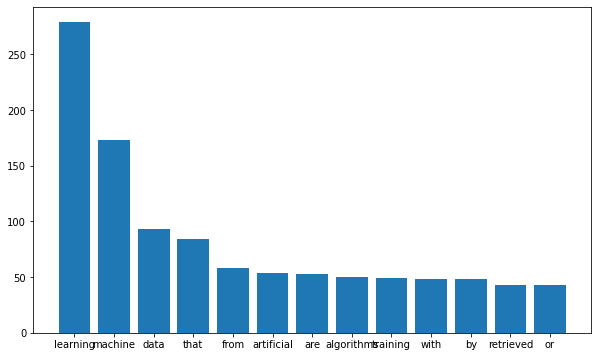

In [ ]:
stopwords = ['the','of','a','and','to','in','on','as','an','for','is','^']

def wordcount3(s):
    wordlist = []
    countlist = []
    
    s = s.replace('.','')
    s = s.replace(',','')
    
    s = s.split()
    
    for word in s:
        if not word.lower() in stopwords:
            if not word.lower() in wordlist:
                wordlist.append(word.lower())
                countlist.append(1)
            else:
                for j in range(len(wordlist)):
                    if wordlist[j] == word.lower():
                        countlist[j] = countlist[j] + 1
                        break
                    
    wordlist2 = []
    countlist2 = []
    
    for i in range(0,len(wordlist)):
        if i <= (len(countlist)) and countlist[i] > 40:
            wordlist2.append(wordlist[i])
            countlist2.append(countlist[i])
                    
    return wordlist2,countlist2

wl,wc = wordcount3(soup)

wc, wl = zip(*sorted(zip(wc, wl),reverse=True))

print(wl)

print(wc)

fig = plt.figure(figsize=(10,6))

plt.bar(wl,wc)

Τι παρατηρείτε; Συμπληρώστε παρακάτω.

---
## 3. Εισαγωγή στην nltk

Η [**nltk**](https://www.nltk.org/) αποτελεί μια βιβλιοθήκη (και όχι μόνο) που ασχολείται με την ανάλυση φυσικής γλώσας μέσω της python. Θα χρησιμοποποιήσετε ορισμένες λειτουργίες αυτής για να βελτιώσετε περαιτέρω την συνάρτηση σας.

**Stemming**: H διαδικασία αυτή διαγράφει τις καταλήξεις από ορισμένες λέξεις με σκοπό να "προσμετρώνται" ως ίδιες. Για παράδειγμα οι λέξεις **programming** και **programmer** θα μετατραπούν σε **program**. Τι καλό προσφέρει αυτό; Παρόμοιες λέξεις θα μετρηθούν ως μία, μειώνοντας έτσι τον χρόνο εκτέλεσης και ενδεχομένως αυξάνοντας την ποιότητα του μοντέλου Machine Learning που θα χρησιμοποιήσετε.

Επισκευτείτε την [Stemmers](https://www.nltk.org/howto/stem.html). Επιλέξετε έναν από τους διαθέσιμους Stemmers και εμπλουτίστε την συνάρτηση σας με αυτόν.

In [ ]:
# Εισάγετε το κατάλληλο module της nltk

from nltk.stem.porter import *

In [ ]:
stopwords = ['the','of','a','and','to','in','on','as','an','for','is','^']

def wordcount(txt):

    s = PorterStemmer()
    
    wordlist = []
    countlist = []
    
    txt = txt.replace('.','')
    txt = txt.replace(',','')
    
    txt = txt.split()
    
    for word in txt:
        if not s.stem(word.lower()) in stopwords:
            if not s.stem(word.lower()) in wordlist:
                wordlist.append(s.stem(word.lower()))
                countlist.append(1)
            else:
                for j in range(len(wordlist)):
                    if wordlist[j] == s.stem(word.lower()):
                        countlist[j] = countlist[j] + 1
                        break
                    
    wordlist2 = []
    countlist2 = []
    
    for i in range(0,len(wordlist)):
        if i <= (len(countlist)) and countlist[i] > 1:
            wordlist2.append(wordlist[i])
            countlist2.append(countlist[i])
                    
    return wordlist2,countlist2


Δοκιμάστε την συνάρτηση σας στις παρακάτω 3 συμβολοσειρές. Συγκρίνετε τις πιο δημοφιλείς λέξεις μεταξύ των text1 και text2 όπως και text1 και text3 και παρουσιάστε τα αποτελέσματα σας σε 3 bar plots.

In [ ]:
text1 = "Daft Punk were a French electronic music duo formed in 1993 in Paris by Guy-Manuel de Homem-Christo and Thomas Bangalter. They achieved popularity in the late 1990s as part of the French house movement; they also had success in the years following, combining elements of house music with funk, techno, disco, indie rock and pop. They are one of the most influential acts in dance music history.After Bangalter and Homem-Christo's indie rock band Darlin' disbanded, they began experimenting with drum machines, synthesizers, and the talk box. Their debut studio album Homework was released by Virgin Records in 1997 to positive reviews, backed by singles \"Around the World\" and \"Da Funk\". From 1999, they assumed robot personas with helmets, outfits, and gloves for public appearances, and rarely granted interviews or appeared on television.[1] They were managed from 1996 to 2008 by Pedro Winter, the head of Ed Banger Records. Daft Punk's second album, Discovery (2001), had further success, supported by hit singles \"One More Time\", \"Digital Love\" and \"Harder, Better, Faster, Stronger\". Their third album, Human After All (2005), received mixed reviews, though the singles \"Robot Rock\" and \"Technologic\" achieved success in the United Kingdom. Daft Punk toured throughout 2006 and 2007 and released the live album Alive 2007, which won a Grammy Award for Best Electronic/Dance Album. They composed the score for the 2010 film Tron: Legacy.In 2013, Daft Punk left Virgin for Columbia Records and released their fourth album, Random Access Memories, to acclaim; lead single \"Get Lucky\" reached the top 10 in the charts of 32 countries. Random Access Memories won five Grammy Awards in 2014, including Album of the Year and Record of the Year for \"Get Lucky\". In 2016, Daft Punk gained their first and only number one on the Billboard Hot 100 with \"Starboy\", a collaboration with the Weeknd. Rolling Stone ranked them No. 12 on its list of the 20 Greatest Duos of All Time. They announced their split in February 2021."
# Πηγή: https://en.wikipedia.org/wiki/Daft_Punk
text2 = "By 1999, the duo was well into the recording sessions for its second album, which had begun a year earlier.[19][20] The 2001 release of Discovery took on a slicker and distinctly synthpop-oriented style, initially stunning fans of Daft Punk's previous material in Homework. The group states that the album was conceived as an attempt to reconnect with a playful, open-minded attitude associated with the discovery phase of childhood.[6] This accounts for the heavy use of themes and samples from the late '70s to early '80s era on the album. The album reached No. 2 in the United Kingdom, and its single, \"One More Time\", was a major club and mainstream hit that nearly topped the UK Singles Chart. The song is well known for being heavily autotuned and compressed.[6] The song and album created a new generation of fans mainly familiar with the second Daft Punk release. The singles \"Digital Love\" and \"Harder, Better, Faster, Stronger\" were also very successful in the UK and on the United States dance chart. \"Digital Love\" was subsequently covered by the bands Kodaline and Hellogoodbye. The song \"Face to Face\" hit No. 1 on the USA club play charts. A 45-minute excerpt from a Daftendirektour performance recorded at Birmingham, UK, in 1997 was also released in 2001, titled Alive 1997.[21]The year 2003 saw the release of the feature-length animated film, Interstella 5555: The 5tory of the 5ecret 5tar 5ystem. Daft Punk produced the film under the supervision of Leiji Matsumoto, who is their childhood hero.[22] The album Daft Club was also released to promote the film. It features a collection of remixes previously made available through an online membership service of the same name."
# Πηγή: https://en.wikipedia.org/wiki/Daft_Punk
text3 = "The Chemical Brothers are a British electronic music duo composed of Tom Rowlands and Ed Simons, from Manchester, England.[4] Originating in 1989, they were pioneers, along with the Prodigy, Fatboy Slim, and other acts, in bringing the big beat genre to the forefront of Western pop culture. The Chemical Brothers released their debut album Exit Planet Dust (1995) on Freestyle Dust/Junior Boy's Own, and it eventually went on to sell over a million copies worldwide. After attracting Virgin Records, the duo achieved more widespread success when their second album Dig Your Own Hole (1997), which topped the UK charts. In the UK, they have had six number-one albums and thirteen Top Twenty singles, including two number ones. Their name came about in 1995 after dropping \"the Dust Brothers\" due to the existence of a U.S. band: \"The Chemical Brothers\" refers to the duo's 1993 groundbreaking \"Chemical Beats,\" which epitomised their genre-defining sound. In the United States the musical act have won six Grammy Awards including Best Rock Instrumental Performance, Best Dance Recording and Best Dance/Electronic Album of the year as recently as 2020."
# Πηγή: https://en.wikipedia.org/wiki/The_Chemical_Brothers

<BarContainer object of 21 artists>

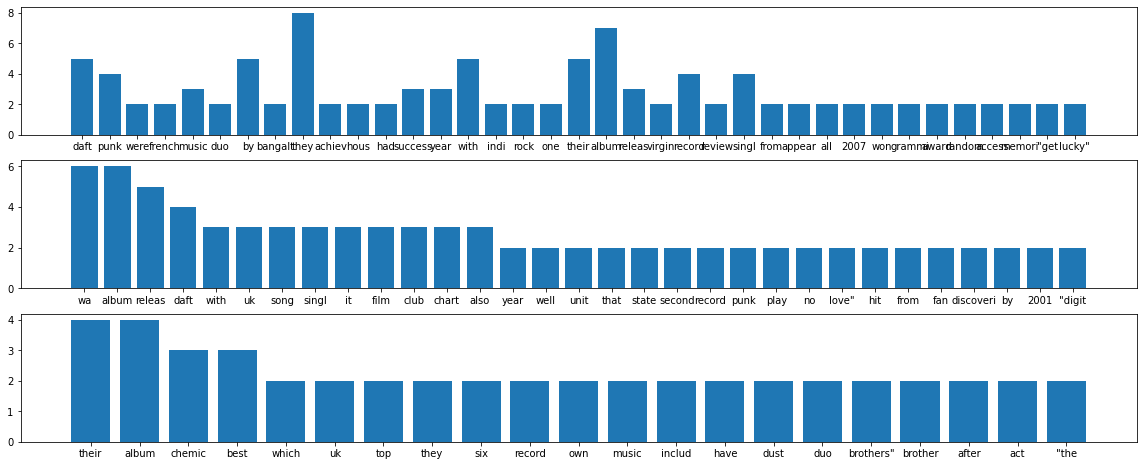

In [ ]:
# Ορισμός αντικειμένου figure

fig = plt.figure(figsize=(20, 8))

# Ορισμός sublot 1

ax = plt.subplot(3, 1, 1)

# Text Analysis + Plotting για το text1

wl, wc = wordcount(text1)

# wc, wl = zip(*sorted(zip(wc, wl),reverse=True))

plt.bar(wl,wc)

# Ορισμός sublot 2

ax = plt.subplot(3, 1, 2)

# Text Analysis + Plotting για το text2

wl, wc = wordcount(text2)

wc, wl = zip(*sorted(zip(wc, wl),reverse=True))

plt.bar(wl,wc)

# Ορισμός sublot 3

ax = plt.subplot(3, 1, 3)

# Text Analysis + Plotting για το text2

wl, wc = wordcount(text3)

wc, wl = zip(*sorted(zip(wc, wl),reverse=True))

plt.bar(wl,wc)

Τι μπορείτε να αποφανθείτε από τις λέξεις για την θεματολογία των κειμένων; Έχουν κοινή θεματολογία; Σχολιάστε παρακάτω.

In [ ]:
# Πόσες λέξεις έχει το λεξιλογιο για κάθε text; Συμπληρώστε την παρακάτω λίστα

wordswithstemming = [190 , 149 , 118]

**Lemmatization:** Η διαδικασία "ομαδοποιεί" λέξεις με παρόμοιο νόημα, όπως και το stemming, ωστόσο λαμβάνει υπ' όψην την σημασία τους. Για να βρεθεί η σημασία κάθε λέξης, πρέπει να υπάρχει όμως ένα λεξικό. Η nltk περιέχει ένα τέτοιο λεξικό (WordNet), το οποίο μπορεί να χρησιμοποιηθεί για τον σκοπό αυτό.

"Τελειοποιήστε" την συνάρτηση σας, πραγματοποιώντας lemmatization αντί για stemming:
* Εισάγετε το module WordNetLemmatizer του nltk.stem - [https://www.nltk.org/_modules/nltk/stem/wordnet.html](https://www.nltk.org/_modules/nltk/stem/wordnet.html)
* Αρχικοποιήστε ένα αντικέιμενο WordNetLemmatizer (χρησιμοποιώντας τον default constructor, όπως έγινε στο stemming)
* Χρησιμοποιήστε την μέθοδο lemmatize σε μία λέξη για να λάβετε την "ισοδύναμη" λέξη του.

In [ ]:
# Εισάγετε το module WordNetLemmatizer του nltk.stem

import nltk
# nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer


In [ ]:
# Βελτιώστε την συνάρτηση σας

stopwords = ['the','of','a','and','to','in','on','as','an','for','is','^']

def wordcount(txt):

    s = WordNetLemmatizer()
    
    wordlist = []
    countlist = []
    
    txt = txt.replace('.','')
    txt = txt.replace(',','')
    
    txt = txt.split()
    
    for word in txt:
        if not s.lemmatize(word.lower()) in stopwords:
            if not s.lemmatize(word.lower()) in wordlist:
                wordlist.append(s.lemmatize(word.lower()))
                countlist.append(1)
            else:
                for j in range(len(wordlist)):
                    if wordlist[j] == s.lemmatize(word.lower()):
                        countlist[j] = countlist[j] + 1
                        break
                    
    wordlist2 = []
    countlist2 = []
    
    for i in range(0,len(wordlist)):
        if i <= (len(countlist)) and countlist[i] > 1:
            wordlist2.append(wordlist[i])
            countlist2.append(countlist[i])
                    
    return wordlist2,countlist2


<BarContainer object of 18 artists>

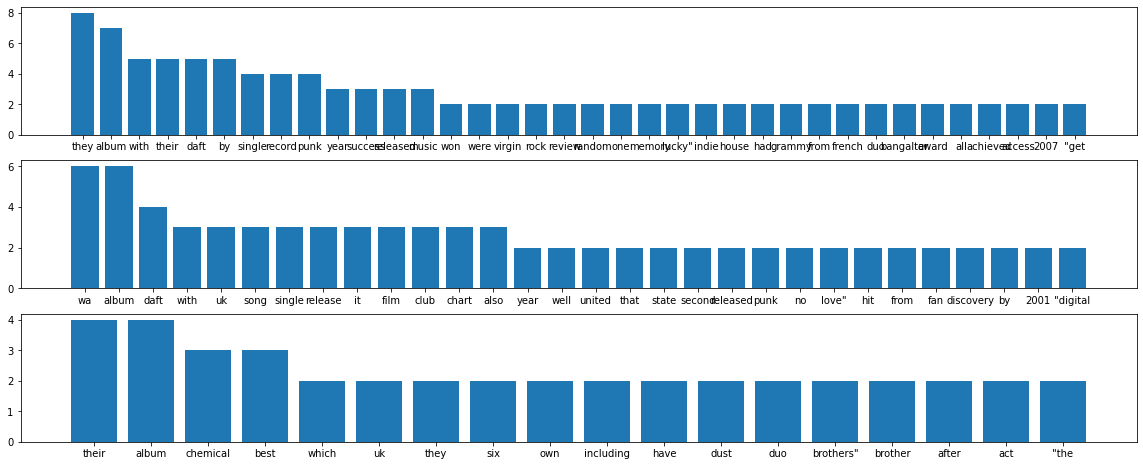

In [ ]:
# Ορισμός αντικειμένου figure

fig = plt.figure(figsize=(20, 8))

# Ορισμός sublot 1

ax = plt.subplot(3, 1, 1)

# Text Analysis + Plotting για το text1

wl,wc = wordcount(text1)

wc, wl = zip(*sorted(zip(wc, wl),reverse=True))

plt.bar(wl,wc)

# Ορισμός sublot 2

ax = plt.subplot(3, 1, 2)

# Text Analysis + Plotting για το text2

wl,wc = wordcount(text2)

wc, wl = zip(*sorted(zip(wc, wl),reverse=True))

plt.bar(wl,wc)

# Ορισμός sublot 3

ax = plt.subplot(3, 1, 3)

# Text Analysis + Plotting για το text2

wl,wc = wordcount(text3)

wc, wl = zip(*sorted(zip(wc, wl),reverse=True))

plt.bar(wl,wc)

In [ ]:
# Πόσες λέξεις έχει το λεξιλογιο για κάθε text; Συμπληρώστε την παρακάτω λίστα

wordswithlemmatizer = [191 , 152 , 121]

In [ ]:
# Εκτελέστε την παρακάτω κελί για την δημιουργία του bar graph μεταξύ των wordswithstemming και wordswithlemmatizer

import numpy as np

z = ['text1', 'text2', 'text3']

fig, ax = plt.subplots(figsize=(12, 6))

bar_width = 0.4

x = np.asarray([1,2,3])

b1 = ax.bar(x, wordswithstemming,width=bar_width,label='NLTK Stemming')
    
b2 = ax.bar(x + bar_width,wordswithlemmatizer,width=bar_width,label='Wordnet Lemmatization')

ax.set_xticks(x + bar_width / 2)
ax.set_xticklabels(z)
ax.legend()

Πιθανότατα θα πρέπει να παρατηρήσετε ότι με την χρήση lemmatization το λεξιλόγιο είναι ελάχιστα μεγαλύτερο. Αυτό συμβαίνει γιατί το o WordNetLemmatizer λαμβάνει υπ' όψην τι μέρος του λόγου είναι κάθε λέξη που λαμβάνει και την θεωρεί by default σαν ουσιαστικό, κάτι το οποίο δεν ισχύει στην πραγματικότητα. Για παράδειγμα, για την λέξη **release** έχει [ολες αυτές τις εγγραφές](http://wordnetweb.princeton.edu/perl/webwn?s=release&sub=Search+WordNet&o2=&o0=1&o8=1&o1=1&o7=&o5=&o9=&o6=&o3=&o4=&h=00). Γενικά στο http://wordnetweb.princeton.edu/perl/webwn μπορείτε να ελέγχετε τις εγγραφές στο "λεξικό" του Wordnet. Άρα τα πράγματα δεν είναι τόσο απλά όταν γίνεται χρήση lemmatization.

---

## 4. Εισαγωγή στην spaCy
Είναι εφικτό όμως να γίνει κατανοητό τι μέρος του λόγου είναι κάθε λέξη στο κείμενο μας;

Η [spaCy](https://spacy.io/) πρόκειται επίσης για μια βιβλιοθήκη που υλοποιεί μεθόδους ανάλυσης κειμένου σε python. Μια από τις (πολλές) υλoποιήσεις που προσφέρει είναι αυτή του **POS** (**P**art-**o**f-**S**peech) **Tagging**. Η διαδικασία αυτή είναι πρακτικά η απάντηση στο ερώτημα που τέθηκε.

Επισκεφτείτε την σελίδα [Installation](https://spacy.io/usage) και επιλεξτε το λειτουργικό σύστημα σας/pip/CPU/English (Virtual env και train models δεν πρέπει να έχουν επιλεχθεί). Στην ενότητα _pip_ της ίδιας μπορείτε να βρείτε και οδηγίες για την εισαγωγή της.

In [ ]:
# Κατεβάστε και εισάγετε την spaCy

import spacy

# Δημιουργήστε ένα αντικείμενο τύπου Language με την load()

nlp = spacy.load("en_core_web_sm")

Το _en_core_web_sm_ που κατεβάσατε μπορείτε να το σκεφτείτε σαν ένα "προ"-εκπαιδευμενο μοντέλο, το οποίο δεδομένης μιας πρότασης (στα αγγλικά) είναι σε θέση να καθορίσει τι μέρος του λόγου (μεταξύ άλλων) είναι κάθε λέξη.


Επισκεφτείτε την σελίδα [spaCy 101](https://spacy.io/usage/spacy-101#annotations-pos-deps) και συγκεκριμένα την ενότητα _Part-of-speech tags and dependencies_. Δημιουργήστε ένα dataframe με τον αντίστοιχο πίνακα που παρουσιάζεται εκεί για κάθε ένα από τα _text1_, _text2_ και _text3_ με τις στήλες **Text**, **Lemma**, **POS** και **STOP**. Τέλος, βρείτε τις μοναδικές λέξεις στην στήλη **Lemma**, χωρίς να λάβετε υπ' όψην τις stopwords (αυτές για τις οποίες ισχύει STOP=True).

In [ ]:
doc1 = nlp(text1)
doc2 = nlp(text2)
doc3 = nlp(text3)

import pandas as pd

df_text1 = pd.DataFrame([(token.text, token.lemma_, token.pos_, token.is_stop) for token in doc1 if not token.is_stop == True],columns=["WORD", "LEMMA", "POS", "STOP"])

df_text2 = pd.DataFrame([(token.text, token.lemma_, token.pos_, token.is_stop) for token in doc2 if not token.is_stop == True],columns=["WORD", "LEMMA", "POS", "STOP"])

df_text3 = pd.DataFrame([(token.text, token.lemma_, token.pos_, token.is_stop) for token in doc3 if not token.is_stop == True],columns=["WORD", "LEMMA", "POS", "STOP"])

# len(df_text1['LEMMA'].unique())
# len(df_text2['LEMMA'].unique())
len(df_text3['LEMMA'].unique())

99

In [ ]:
# Πόσες λέξεις έχει το λεξιλογιο για κάθε text; Συμπληρώστε την παρακάτω λίστα

wordswithSPACYlemmatizer = [176 , 138 , 99]

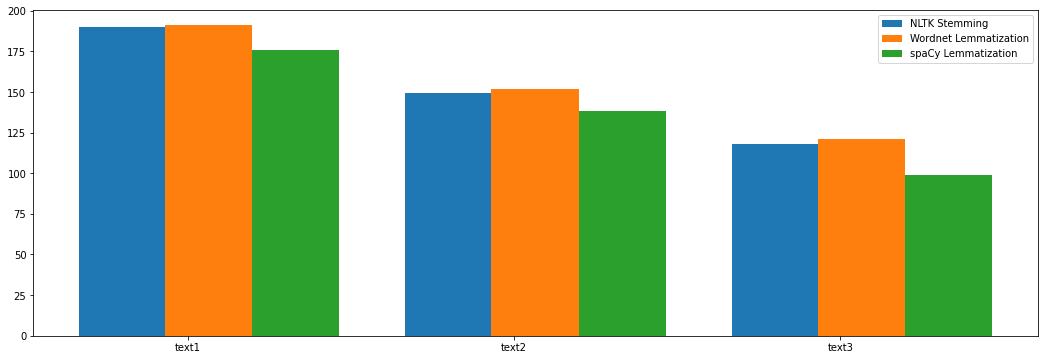

In [ ]:
# Εκτελέστε την παρακάτω κελί για την δημιουργία του bar graph μεταξύ των wordswithstemming, wordswithlemmatizer 
# και wordswithSPACYlemmatizer

import numpy as np

z = ['text1', 'text2', 'text3']

fig, ax = plt.subplots(figsize=(18, 6))

bar_width = 0.4

x = np.asarray([1,2,3])

b1 = ax.bar(x, wordswithstemming,width=bar_width/1.5,label='NLTK Stemming')
    
b2 = ax.bar(x + 0.66*bar_width,wordswithlemmatizer,width=bar_width/1.5,label='Wordnet Lemmatization')

b2 = ax.bar(x + 1.328*bar_width,wordswithSPACYlemmatizer,width=bar_width/1.5,label='spaCy Lemmatization')

ax.set_xticks(x + bar_width / 2)
ax.set_xticklabels(z)
ax.legend()

Τι παρατηρείτε; Συμπληρώστε παρακάτω.

Τέλος, επιλέξτε ένα από τα _text1_, _text2_ και _text3_ και παρουσιάστε ένα bar plot με τα μέρη του λόγου τα οποία περιέχει.

       POS
PROPN   78
PUNCT   76
NOUN    62
VERB    31
NUM     20
ADJ     15
ADV      1
SYM      1
PART     1
X        1


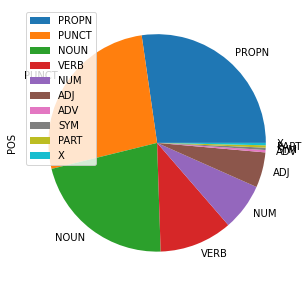

In [ ]:
# Χρησιμοποιήστε την value_counts() για να βρείτε πόσες φορές εμφανίζεται κάθε τιμή στην στήλη Outcome

res = df_text1['POS'].value_counts()

# Κατασκευάστε ένα νέο dataframe από το αποτέλεσμα
# Υπόδειξη: Χρησιμοποιήστε την to_frame()

res = res.to_frame()

print(res)

# Δημιουργήστε την γραφική παράσταση
# Υπόδειξη: Συμβουλευτέιτε τον συνδεσμο για το documentation παραπάνω

plot = res.plot.pie(y='POS',figsize=(5,5))


> Χατζής Χρήστος - cs120004@di.uoa.gr - v1.0